In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df=pd.read_csv("cluster01.csv",index_col=0)

In [3]:
df["lable_cluster"].value_counts()

0    69901
Name: lable_cluster, dtype: int64

In [4]:
df.head()

,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,...,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,preferred_foot,attacking_work_rate,defensive_work_rate,experience_no_of_days,lable_cluster
20,70.0,79.0,77.0,50.0,51.0,67.0,28.0,66.0,66.0,68.0,...,13.0,6.0,8.0,8.0,11.0,1,0,0,3017,0
21,70.0,79.0,77.0,50.0,51.0,67.0,28.0,66.0,66.0,68.0,...,13.0,6.0,8.0,8.0,11.0,1,0,0,3052,0
22,69.0,79.0,77.0,50.0,50.0,64.0,28.0,66.0,66.0,68.0,...,13.0,6.0,8.0,8.0,11.0,1,0,0,3087,0
23,69.0,79.0,77.0,50.0,50.0,64.0,28.0,66.0,66.0,68.0,...,13.0,6.0,8.0,8.0,11.0,1,0,0,3101,0
24,69.0,80.0,77.0,50.0,50.0,64.0,28.0,65.0,65.0,68.0,...,13.0,6.0,8.0,8.0,11.0,1,0,0,3241,0


In [5]:
# droping unnecessary columns
df.drop(["lable_cluster"],axis=1,inplace=True)

In [6]:
df.head()

,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,...,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,preferred_foot,attacking_work_rate,defensive_work_rate,experience_no_of_days
20,70.0,79.0,77.0,50.0,51.0,67.0,28.0,66.0,66.0,68.0,...,72.0,13.0,6.0,8.0,8.0,11.0,1,0,0,3017
21,70.0,79.0,77.0,50.0,51.0,67.0,28.0,66.0,66.0,68.0,...,72.0,13.0,6.0,8.0,8.0,11.0,1,0,0,3052
22,69.0,79.0,77.0,50.0,50.0,64.0,28.0,66.0,66.0,68.0,...,72.0,13.0,6.0,8.0,8.0,11.0,1,0,0,3087
23,69.0,79.0,77.0,50.0,50.0,64.0,28.0,66.0,66.0,68.0,...,72.0,13.0,6.0,8.0,8.0,11.0,1,0,0,3101
24,69.0,80.0,77.0,50.0,50.0,64.0,28.0,65.0,65.0,68.0,...,72.0,13.0,6.0,8.0,8.0,11.0,1,0,0,3241


In [7]:
df = df.reset_index(drop=True)

In [8]:
df

,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,...,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,preferred_foot,attacking_work_rate,defensive_work_rate,experience_no_of_days
0,70.0,79.0,77.0,50.0,51.0,67.0,28.0,66.0,66.0,68.0,...,72.0,13.0,6.0,8.0,8.0,11.0,1,0,0,3017
1,70.0,79.0,77.0,50.0,51.0,67.0,28.0,66.0,66.0,68.0,...,72.0,13.0,6.0,8.0,8.0,11.0,1,0,0,3052
2,69.0,79.0,77.0,50.0,50.0,64.0,28.0,66.0,66.0,68.0,...,72.0,13.0,6.0,8.0,8.0,11.0,1,0,0,3087
3,69.0,79.0,77.0,50.0,50.0,64.0,28.0,66.0,66.0,68.0,...,72.0,13.0,6.0,8.0,8.0,11.0,1,0,0,3101
4,69.0,80.0,77.0,50.0,50.0,64.0,28.0,65.0,65.0,68.0,...,72.0,13.0,6.0,8.0,8.0,11.0,1,0,0,3241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69896,68.0,79.0,71.0,48.0,63.0,67.0,52.0,65.0,50.0,52.0,...,69.0,9.0,8.0,5.0,5.0,8.0,1,0,0,4042
69897,78.0,78.0,77.0,70.0,59.0,80.0,77.0,78.0,84.0,78.0,...,30.0,9.0,13.0,8.0,15.0,5.0,0,0,2,3486
69898,81.0,81.0,80.0,72.0,59.0,86.0,77.0,80.0,86.0,78.0,...,30.0,9.0,13.0,8.0,15.0,5.0,0,0,2,3677
69899,81.0,81.0,80.0,72.0,59.0,86.0,77.0,80.0,86.0,78.0,...,30.0,9.0,13.0,8.0,15.0,5.0,0,0,2,3853


In [9]:
# For data analysis
from pandas_profiling import ProfileReport
pf=ProfileReport(df)
pf.to_file("report of cluster 0.html")

KeyboardInterrupt: 

In [10]:
# Drop duplicate row
df.drop_duplicates(inplace=True)

In [11]:
df.describe()

,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,...,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,preferred_foot,attacking_work_rate,defensive_work_rate,experience_no_of_days
count,69876.000000,69876.000000,69876.000000,69876.000000,69876.000000,69876.000000,69876.000000,69876.000000,69876.000000,69876.000000,...,69876.000000,69876.000000,69876.000000,69876.000000,69876.000000,69876.000000,69876.000000,69876.000000,69876.000000,69876.000000
mean,68.874979,73.469546,55.106331,49.418656,57.102939,62.512794,49.067305,58.919486,52.630574,49.267116,...,47.563498,15.284762,14.979192,14.837426,15.053895,15.393440,0.247810,0.326307,0.353469,3360.736433
std,6.629293,6.365282,17.721574,19.308395,17.163252,14.287953,18.418882,18.264575,18.559398,18.141287,...,21.781384,17.406796,16.449870,15.819595,16.698501,17.834213,0.431744,0.574508,0.666571,323.329810
min,40.000000,45.000000,4.000000,3.000000,1.000000,3.000000,2.000000,5.000000,2.000000,4.000000,...,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,2940.000000
25%,64.000000,69.000000,46.000000,34.000000,50.000000,58.000000,35.000000,52.000000,41.000000,36.000000,...,25.000000,8.000000,8.000000,8.000000,8.000000,8.000000,0.000000,0.000000,0.000000,3101.000000
50%,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,64.000000,56.000000,51.000000,...,52.000000,11.000000,11.000000,11.000000,10.000000,10.000000,0.000000,0.000000,0.000000,3283.000000
75%,73.000000,78.000000,68.000000,65.000000,69.000000,72.000000,63.000000,72.000000,67.000000,64.000000,...,67.000000,13.000000,14.000000,14.000000,14.000000,13.000000,0.000000,1.000000,0.000000,3677.000000
max,94.000000,97.000000,91.000000,97.000000,95.000000,97.000000,93.000000,97.000000,94.000000,93.000000,...,94.000000,91.000000,89.000000,92.000000,91.000000,93.000000,1.000000,4.000000,4.000000,4042.000000


# Outlier Treatment

In [12]:
#no outlier is here because all rating range between 0 to 100 expect exp no of days
for i in df.columns:
    print(max(df[i]))

94.0
97.0
91.0
97.0
95.0
97.0
93.0
97.0
94.0
93.0
96.0
97.0
97.0
97.0
96.0
96.0
96.0
96.0
96.0
96.0
95.0
93.0
96.0
94.0
94.0
97.0
95.0
92.0
94.0
94.0
91.0
89.0
92.0
91.0
93.0
1
4
4
4042


In [13]:

# sns.pairplot(df)
# plt.savefig('books_read.png')# 

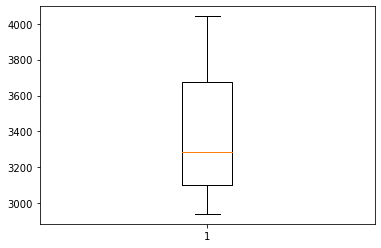

In [14]:
# Creating plot
plt.boxplot(df["experience_no_of_days"])
 
# show plot
plt.show()

In [16]:
# experience_no_of_days doesnot have any outlier

# Multicolinearity

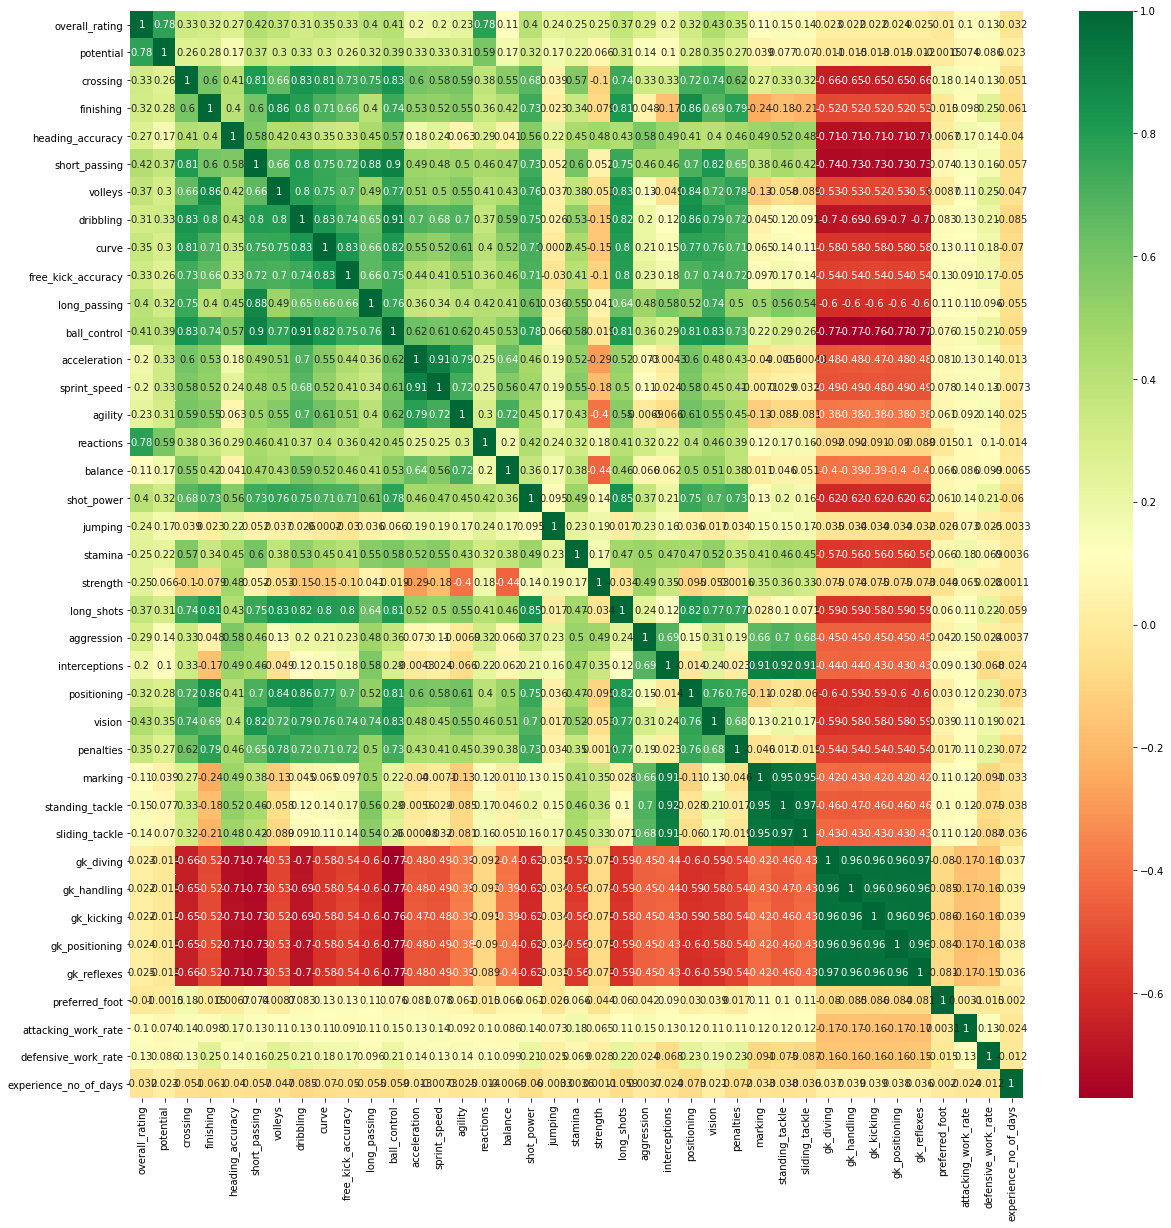

In [17]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")
plt.savefig('corr_cluster_0.png')

In [15]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr


In [16]:
# more than .9 corelation so multicolinearity exist so we drop this column 
corr_features = correlation(df, 0.9)
len(set(corr_features))

corr_features

{'ball_control',
 'gk_handling',
 'gk_kicking',
 'gk_positioning',
 'gk_reflexes',
 'marking',
 'sliding_tackle',
 'sprint_speed',
 'standing_tackle'}

In [17]:
df.drop(corr_features,axis=1,inplace=True)

In [18]:
df.shape

(69876, 30)

In [19]:

x=df.drop("overall_rating",axis=1)
y=df["overall_rating"]

In [20]:
x_train, x_test, y_train,y_test = train_test_split(x, y,test_size= 0.2,random_state = 100)

In [21]:
from sklearn.ensemble import RandomForestRegressor

rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
y_pred=rfr.predict(x_test)

In [22]:
print("train data R2->",rfr.score(x_train,y_train))
print("test data R2->",rfr.score(x_test,y_test))

train data R2-> 0.9964268995774724
test data R2-> 0.9769402773329555


In [26]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 100, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
#min_samples_split = [int(x) for x in np.linspace(2, 100,50)]
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              }
print(random_grid)

{'n_estimators': [20, 28, 37, 46, 55, 64, 73, 82, 91, 100], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8]}


In [27]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [20, 28, 37, 46, 55, 64,
                                                         73, 82, 91, 100]},
                   random_state=100, verbose=2)

In [28]:
rf_randomcv.best_params_

{'n_estimators': 82,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 560}

In [29]:
param_grid = {
    
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'], 
                         rf_randomcv.best_params_['min_samples_leaf']+2, 
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] + 2,
                          rf_randomcv.best_params_['min_samples_split'] + 1,
                          rf_randomcv.best_params_['min_samples_split'], 
                          rf_randomcv.best_params_['min_samples_split'] +1,
                          rf_randomcv.best_params_['min_samples_split'] + 2],
    'n_estimators': [ rf_randomcv.best_params_['n_estimators'] - 50, 
                     rf_randomcv.best_params_['n_estimators'], 
                     rf_randomcv.best_params_['n_estimators'] + 50, rf_randomcv.best_params_['n_estimators'] + 100]
}

print(param_grid)

{'max_depth': [560], 'max_features': ['sqrt'], 'min_samples_leaf': [1, 3, 5], 'min_samples_split': [4, 3, 2, 3, 4], 'n_estimators': [32, 82, 132, 182]}


In [30]:
from sklearn.model_selection import GridSearchCV
rf=RandomForestRegressor()
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(x_train,y_train)

Fitting 10 folds for each of 60 candidates, totalling 600 fits


GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [560], 'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [4, 3, 2, 3, 4],
                         'n_estimators': [32, 82, 132, 182]},
             verbose=2)

In [32]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=560, max_features='sqrt', n_estimators=182)

In [29]:
from sklearn.ensemble import RandomForestRegressor

rfr=RandomForestRegressor(max_depth=560, max_features='sqrt', n_estimators=182,ccp_alpha=.005)
rfr.fit(x_train,y_train)
y_pred=rfr.predict(x_test)

In [30]:
print("train data R2->",rfr.score(x_train,y_train))
print("test data R2->",rfr.score(x_test,y_test))

train data R2-> 0.9490493248908483
test data R2-> 0.9443282207867361


In [32]:
import pickle
pickle.dump(rfr,open('randomforest_cluster_1.pickle','wb'))

In [31]:
rfr.ccp_alpha

0.005

In [36]:
for i in x_train.columns:
    print(i)
    print(",")

potential
,
crossing
,
finishing
,
heading_accuracy
,
short_passing
,
volleys
,
dribbling
,
curve
,
free_kick_accuracy
,
long_passing
,
acceleration
,
agility
,
reactions
,
balance
,
shot_power
,
jumping
,
stamina
,
strength
,
long_shots
,
aggression
,
interceptions
,
positioning
,
vision
,
penalties
,
gk_diving
,
preferred_foot
,
attacking_work_rate
,
defensive_work_rate
,
experience_no_of_days
,


In [ ]:
potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,acceleration,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,gk_diving,preferred_foot,attacking_work_rate,defensive_work_rate,experience_no_of_days,

In [37]:
l=[potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,acceleration,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,gk_diving,preferred_foot,attacking_work_rate,defensive_work_rate,experience_no_of_days,]

NameError: name 'potential' is not defined